 ## Simulacion de deteccion de exoplanetas


El tránsito astronómico es un fenómeno durante el cual un astro pasa por delante de otro más grande, bloqueando en cierta medida su visión. Este es el método más utilizado actualmente para la búsqueda de exoplanetas y consiste en medir el cambio del brillo de una estrella cuando uno de sus planetas pasa por delante de ella, con lo que oscurece parte de la misma. Si de forma periódica se percibe esta disminución, se puede inferir que un objeto opaco está orbitando la estrella.
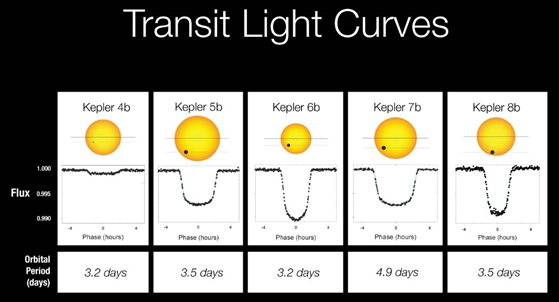
La cantidad de luz perdida depende de los tamaños de la estrella y del planeta. La duración del tránsito depende de la distancia del planeta a la estrella y de la masa estelar. Puesto que la masa y el tamaño de la estrella pueden ser determinado mediante observaciones espectroscópicas, se puede determinar el tamaño del planeta y su distancia a partir de la curva de luz 

Los objetivos de este ejercicio son:
- Simular una orbita planetaria circular con una estrella en el centro del sistema de coordenadas
- Graficar la orbita en el plano de rotacion
- Graficar lo que veria un observador ubicado sobre el plano de la orbita
- Analizar la diferencia de iluminacion percibida por el observador y generar una señal de intensiad luminosa vs tiempo (agregar ruido a la señal y luego hacer un ajuste tambien puede ser)
- Inferir con los mismos modelos utilizados en astronomia, los parametros del sistema (masa, tamaño y distancia del exoplaneta)
   
    https://www.astro.ex.ac.uk/people/alapini/Publications/PhD_chap1.pdf



La velocidad tangencial para una orbita circular depende del radio de la orbita como

\begin{equation}
v =\sqrt{\frac{G M_s}{D}}
\label{eq:0}
\end{equation}

y la frecuencia angular es 
\begin{equation}
\omega=v/D
\label{eq:01}
\end{equation}

\begin{equation}
x=D sin(wt)
\label{eq:02}
\end{equation}

\begin{equation}
y=D cos(wt)
\label{eq:03}
\end{equation}
la diferencia entre la señal cuando el planeta pasar por delante de la estrella $F_{transit}$ y cuando no pasa por delante $F_{no transit}$, da la relacion entre el radio planetario $r$ y el radio estelar $R_s$

\begin{equation}
\Delta F =\frac{F_{no transit}-F_{transit}}{F_{no transit}} = (\frac{r}{R_s})^2  = k^2
\label{eq:1}
\end{equation}

La relacion entre el semieje mayor de la orbita $a$ y el radio estelar, para el caso en que el observador se encuentre sobre el plano de la orbita, esta dado por el parametro $b$
En nuestro caso, si la orbita es circular entonces $a=D$, y las ecuaciones (1.8) y (1.9) quedan:

\begin{equation}
    b=\frac{\sqrt{(1-k)^2-(t_F/t_T)^2*(1+k)^2}}{\sqrt{1-(t_F/t_T)^2}}
\label{eq:4}
\end{equation}

\begin{equation}
    \frac{D}{R_s}=\frac{\sqrt{(1+k)^2-b^2*(1-sin^2(t_T*\pi/P))}}{sin(t_T*\pi/P)}
\label{eq:5}
\end{equation}  



Pasos:

- instalar e importar el modulo openCV (se importa como `import cv2`):
    - buscar como se utiliza en la documentacion
    - con el modulo `cv2.circle()` escribir una funcion `astro(radio,xposit)` que devuelva una matriz con todos sus elementos igual a cero excepto un circulo de radio (radio), centrado en xposit



- escribir una funcion `observador(posicion)` que devuelva una matriz con la diferencia entre las imagenes de los astros de Radio R y r dada la posicion del planeta
    - centrar la estrella en xposit=0
        
    
- genere arrays de valores tiempo y posicion que representen la coordenada x del planeta y grafique la matriz obtenida en `observador()` para algunas posiciones
    - tener en cuenta que si la posicion $x$ del planeta es una funcion sinusoidal, el observador vera la sombra del planeta solamente en las regiones en que la funcion seno es creciente o  en las que es decreciente, porque en los demas casos el planeta queda tapado por la estrella. 
    - generar una funcion `seno_creciente(t)` que devuelva la funcion seno en las regiones que el seno es creciente y 1 en las regiones que es decreciente. el argumento t debe ser un array de numpy
    - grafique la posicion del planeta en funcion del tiempo, la posicion correguida con el seno creciente en funcion del tiempo y el rango que abarca el haz de la estrella.
    
    
    
- escriba una funcion `signal(x)` que devuelva la señal intensidad del flujo luminoso ($f$) leida como el valor medio de la imagen segun la posicion x del planeta .
    - grafique la señal vs tiempo
    - encuuentre el periodo orbital $P$ los flujos durante y fuera del transito $F_{notransit}$, $F_{transit}$ y la duracion de los tiempos  $t_F$ y $t_T$
    


- analizar la señal encontrada para determinar $\Delta F$ (diferencia del flujo), $t_T$ (tiempo de transito) , $t_F$ (tiempo de señal plana)y $P$ (periodo orbital)
    - escribir una funcion que con estos parametros encuentre $(\frac{r}{R_s})$ y $\frac{D}{R_s}$
    - comparelos con los valores originales
    
    
    
- **(opcional)**  escribir un funcion que tome las relaciones encontradas anteriormente y devuelva **True** si se cumple la condicion de que planeta este en la zona habitable (investigar cual es esta condicion) y **False** si no.


- **(opcional)** importar los modulos de matplotlib para animaciones (`matplotlib.animation as animation`):
    - buscar como se utiliza en la documentacion
 - escribir una funcion `orbita(M_s,R_s,m,r,D)` que tome como parametros la masa $M_s$ y radio de de la estrella y $R_s$, la del planeta $m$, el radio del planeta $r$ y la distancia a la estrella $D$. La funcion debe devolver las coordenadas de la orbita en funcion del tiempo y la animacion de la orbita en el plano de rotacion.

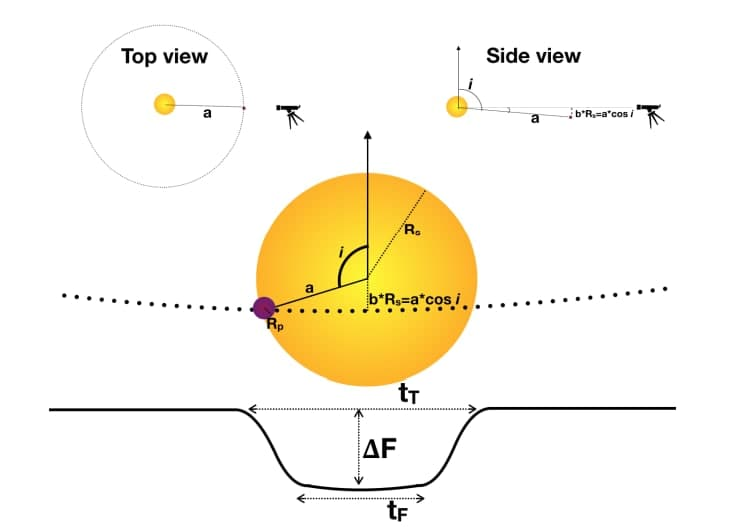

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math



def astro(radio,xposit):
    
    '''
    devuelve una matriz con todos sus elementos igual a cero
    excepto un circulo de radio (radio), centrado en xposit
    '''
    height, width = 200, 200
    img = np.zeros((height, width), np.uint8)
    img[:, :] = [255]
    

    row, col = int(height/2), int(width/2)+int(xposit)
   

    astro=cv2.circle(img,(col, row), radio, (0), -1)

    return astro 

def seno_creciente(t):
    
    '''
    devuelve la funcion seno en las regiones que el seno es creciente
    y 1 en las regiones que es decreciente. el argumento t es un array
    '''
    
    z=[]

    for val in t:
        if 0<math.cos(val):
                
            newval=math.sin(val)
           
        else:
            newval=1
        z.append(newval)
    return np.array(z) 


def observador(posicion):
    '''
    devuelve la diferencia entre las iamgenes de los astros de Radio R y r
    dada la posicion del planeta
    '''
    
    plt.axis('off')
    diff=-astro(R,0)+astro(r,posicion)
    diff=cv2.blur(diff, (3, 5))
    imagen=plt.imshow(diff,cmap ="binary_r")
    
    return imagen,diff

def signal(x):
    
    '''
    devuelbe la señal intensidad del flujo luminoso (f)
    leida como el valor medio de la imagene segun la posicion x del planeta
    f es un array
    '''
    f=[]
    
    for i in x:
        xposit=int(i)
        sol=cv2.blur(astro(R,0), (57,57))
        
        diff=-sol+astro(r,xposit)
        
        diff=cv2.blur(diff, (5,5))
        
        flujo=diff.mean()
        
        f.append(flujo)
     
    return f

In [ ]:
M=50

R=55
r=5
D=700
G= 1

observador(35)[0]

In [ ]:
%matplotlib inline



v=np.sqrt(G*M/D)


tfinal=15500
Nsamples=tfinal//10
t=np.linspace(0,tfinal*np.pi,Nsamples)

decay=1 #*np.exp(-0.0005*t)

x=D*seno_creciente(v*t/D)*decay
    
plt.plot(t,x,label='(planeta tapado)')
#plt.plot(t,D*np.sin(v*t/D)*decay,  '--', label='sin tapar')



plt.axhspan(-R, R, alpha=0.1, color='orange', label='haz de la estrella')
plt.xlabel('tiempo')
plt.ylabel('amplitud orbital corrdenada x')
plt.legend()


plt.show()

In [ ]:
ruido = 0.0051 * np.random.normal(size=x.size)

y=signal(x)+ruido



plt.plot(t,y)#,color='black')
plt.xlabel('tiempo')
plt.ylabel('flujo de intensidad luminica')
plt.title('señal obtenida por el observador')
#plt.xlim((16200,16600))
plt.grid()
plt.show()

plt.plot(t,y,"-*")
plt.title('zoom en uno de los pozos')
plt.xlabel('tiempo')
plt.ylabel('flujo de intensidad luminica')

plt.xlim((16200,16600))
plt.grid()
plt.show()

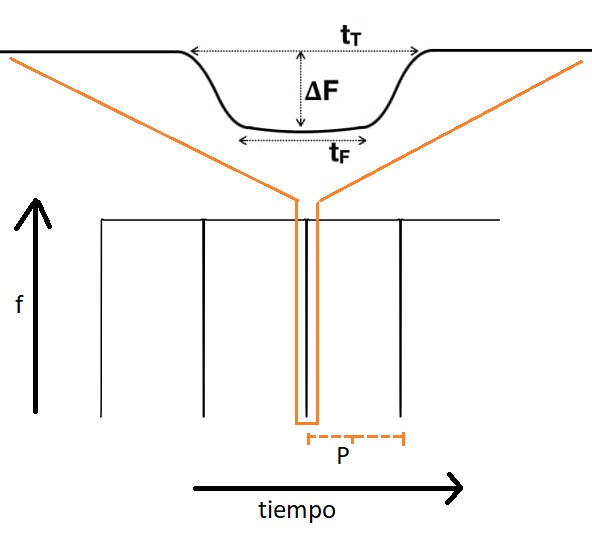

In [ ]:
#guardar .csv

import pandas as pd
import numpy as np
df = pd.DataFrame({"tiempo" : t, "signal" : y})
df.to_csv("signal.csv", index=False)

In [ ]:
from math import *
def analize(F_notransit, F_transit, t_F, t_T, P):
    #t_F= tiempo de transito (abajo)
    #t_T (arriba)
    k=sqrt((F_notransit - F_transit) / F_notransit)
    b=sqrt((1-k)**2-(t_F/t_T)**2*(1+k)**2) / sqrt(1-(t_F/t_T)**2)
    a=sqrt((1+k)**2-b**2*(1-sin(t_T*np.pi/P)**2)) / sin(t_T*np.pi/P)
    return k, a


an=analize(60.41,59.9,100,250,40000/3)
print('Parametros usados, parametros estimados')
print(r/R,"|",an[0])
print(D/R,"|",an[1])

In [ ]:
def hab_zone(L, Teff, r_orbit):
    
    r_orbit=r_orbit/500 #(AU)
    Ts=5700 #K
    ai=2.7619E-5
    bi=3.8095E-9
    ao=1.3786E-4
    bo=1.4286E-9
    ris=0.72
    ros=1.77
    
    ri = (ris - ai*(Teff - Ts) - bi*((Teff - Ts))**2)/sqrt(L)
    ro = (ros - ao*(Teff - Ts) - bo*((Teff - Ts))**2)/sqrt(L)
    
    HZD= (2*r_orbit - ri - ro) /(ro-ri)
    
    return abs(HZD)


if hab_zone(1, 6000, D)<1 and hab_zone(1, 6000, D)>0.1:
    print('planeta en zona habitable')
    
else:
    print('..')

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
decay=1# *np.exp(-0.000005*t)
x = D * np.sin(v*t/D)*decay
y = D * np.cos(v*t/D)*decay
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_xlim((-D-100,D+100))
ax.set_ylim((-D-100,D+100))

particle, = ax.plot([],[], marker='o', markersize=r,color='b')
traj, = ax.plot([],[], alpha=0.5,color='b')


def update(i):
    
    particle.set_data(x[i],y[i])
    particle.set_label('time:'+str(i))
    traj.set_data(x[:i+1],y[:i+1])
    plt.legend(bbox_to_anchor=(.04,1), loc="upper left")
    return particle,traj

ani = animation.FuncAnimation(fig, update,interval=100)

ax.set_aspect('equal', adjustable='box')
plt.axvspan(-R, R, alpha=0.1, color='orange', label='linea estrella-observador')
plt.plot(0,0, 'o', markersize=R,color='orange')
plt.plot(0,D+90, 'v',color='black', label='observador')
plt.xlabel('cordeenada x')
plt.ylabel('cordeenada y')
#plt.axhline(y=.5, xmin=0.5, xmax=0.0013*D, color='black',label='radio orbital $D$')
#plt.xticks([0,15],label='aca va el cero')

ax.annotate('distancia orbital $D$', 
            xy=(0, 0), 
            xytext=(D+10, -10), 
            arrowprops = dict(arrowstyle='|-|',facecolor='black')
           )


ax.annotate('radio estelar $R$', 
            xy=(-R,-200), 
            xytext=(0,-210), 
            arrowprops = dict(arrowstyle='|-|',facecolor='orange')
           )

plt.show()

print('si no se ve nada reiniciar el kernel')